# TMA4320 vår 2023 - Industriell Matematikk-Prosjekt
## Dictionary learning for classification problems

Casper Lindeman, Gonchigsuren Bor og Stian Mæhre

# Introduksjon

Maskinlæring er en gren innen kunstlig inteligens. Det går ut på å bygge algoritmer og funksjoner som kan finne mønstre og gjøre predikasjoner basert på informasjon fra store datasett. For tiden er maskinlæring og kunstlig intelligens et mye omtalt tema, et eksempel på dette er ChatGPT. Maskinlæring er essensielt i mange sektorer i samfunner vårt. Blant annet selvkjørende biler, epost-filtrering, språk og bildegjennkjenning og mye mer. I dette prosjektet skal vi studere og anvende en seksjon av maskinlæringen som kalles "dictionary learning". Vi skal bruke dictionary learning til å klassifisere tall fra MNIST datasettet, og se på fordeler og ulemper ved ulik anvendelse av dictionary learning.

In [1]:
#Biblioteker brukt i prosjektet
import numpy as np
import matplotlib.pyplot as plt

### Oppgave 1

Før vi skal anvende dictionary learning på MNIST datasettet skal vi definere funksjoner vi får bruk for, og teste disse på enkle eksempler. I prosjektet kommer vi til å bruke to ulike teknikker, Singular Value Decomposition (SVD) og Exemplar-based Non-negative Matrix Factorization (ENMF).

Vi starter med å definere noen testmatriser og testvektorer som brukes gjennom hele oppgave 1.

In [2]:
#Testdatasett
A1 = np.array([[1000, 1],
               [0,1],
               [0,0]])
A2 = np.array([[1,0,0],
               [1,0,0],
               [0,0,1]])

#Testvektorer
b1 = np.array([2,1,0])
b2 = np.array([0,0,1])
b3 = np.array([0,1,0])

B = np.array([b1,b2,b3])
B = B.T

**(a)** Når man skal ta for seg dictionary learning starter man med et datasett. Den kan representeres som en $mxn$ matrise. Da har vi $n$ kolonnevektorer som tilsvarer $n$ vektorer i $R_m$. SVD er den første Dictionary learning-teknikken vi skal se på. SVD faktoriserer $A$ i tre matriser slik at

$A = U \cdot \Sigma \cdot V_T$.

For $A$ med dimensjonene $mxn$ får vi dimensjonene for $U$ lik $mxm$, $\Sigma$ lik $mxn$ og $V_T$ lik $nxn$. Herfra vil $\Sigma$ bli omtalt som $S$. Kolonnevektorene i $U$ utgjør en ortogonal basis som spenner ut et underom som omfanger alle kolonnevektorene i $A$. $U$ vil tilsvare det vi kaller dictionary senere. $S$ vil være en diagonalmatrise med singulærverdier i synkende rekkefølge.

Senere vil $A$ inneholde informasjon om håndskrevne tall fra MNIST datasettet. Men først skal vi bruke testdatasettene $A_1$ og $A_2$ sammen med testvektorene $b_1$, $b_2$ og $b_3$, som vil være kolonnevektorene i $B$. 

Vi starter med å lage en funkjson som tar SVD av en matrise. Denne funksjonen skal testes på $A_1$, og brukes til å finne ut hvilken av basisvektorene i $U$ som er viktigst for å gjenskape $A_1$.

In [3]:
'''''

Funksjon som regner ut SVD av en matrise.

'''''

def SVD(matrix):
    U,S,V = np.linalg.svd(matrix,full_matrices=False) #S = Σ
    return U,S,V

In [4]:
U1,S1,V1 = SVD(A1)

A1_gjenskapt = U1*S1@V1
A1_gjenskapt_col1 = np.array([U1[:,0]]).T*S1[0]@np.array([V1[0,:]]) #Gjenskaper A1 med første basisvektor i V1
A1_gjenskapt_col2 = np.array([U1[:,1]]).T*S1[1]@np.array([V1[1,:]]) #Gjenskaper A1 med andre basisvektor i V1                                 

print(f"U = \n {U1} \n")
print(f"S = \n {S1} \n")
print(f"V_T = \n {V1} \n")
print('Is U*S*V close to A1?', np.isclose(A1_gjenskapt, A1).all(), "\n") #Sjekker om A1_gjenskapt og A1 er like.

print('Er U*S*V for andre kolonne tilnærmet lik A1?', np.isclose(A1_gjenskapt_col1, A1).all())
print('Er U*S*V for første kolonne tilnærmet lik A1?', np.isclose(A1_gjenskapt_col2, A1).all(), "\n")

print(f"Gjenskaping av A1 med første kolonne: \n {A1_gjenskapt_col1}\n")
print(f"Gjenskaping av A1 med andre kolonne: \n {A1_gjenskapt_col2}\n")

U = 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]] 

S = 
 [1.0000005e+03 9.9999950e-01] 

V_T = 
 [[ 0.9999995  0.001    ]
 [-0.001      0.9999995]] 

Is U*S*V close to A1? True 

Er U*S*V for andre kolonne tilnærmet lik A1? False
Er U*S*V for første kolonne tilnærmet lik A1? False 

Gjenskaping av A1 med første kolonne: 
 [[1.000000e+03 1.000001e+00]
 [1.000000e-03 1.000001e-06]
 [0.000000e+00 0.000000e+00]]

Gjenskaping av A1 med andre kolonne: 
 [[ 1.00000e-09 -9.99999e-07]
 [-1.00000e-03  9.99999e-01]
 [ 0.00000e+00  0.00000e+00]]



Over har vi printet ut $U_1$, $S_1$ og $V^T_1$ fra SVD til $A_1$. Vi ser også at $U_1 \cdot S_1 \cdot V^T_1 $ er en god approksimasjon til $A_1$. Grunnen til at $U_1 \cdot S_1 \cdot V^T_1 $ ikke nødvendigvis er lik $A_1$ er fordi python-kode kjører i det binære tallsystemet med begrenset nøyaktighet, og vi kan derfor få flyttalsfeil.

Vi ser at gjenskaping av $A_1$ med kun en basisvektor av gangen ikke genskaper $A_1$ presist. Derimot det vi observerer er at basisvektoren som tilhører den største singulærverdien i $S_1$ gir beste tilnærming av $A_1$.

**(b)** SVD kalkulasjoner er tidkrevende og skalerer dårlig med store datasett. Det er derfor heniksmessig å se på mulighetene til å redusere antall basisvektorer i $U$. Fra forrige oppgave fant vi ut at egenvektorene som tilhører de største silgularverdiene er viktigst for å gjenskape $A$. Siden singulærverdiene lagres i synkende rekkefølge langs diagonalen i $S$ kan vi fjerne de $n-d$ siste radene i $S$, og beholde en best mulig tilnærming av $A$. Vi definerer funsjonen `truncSVD2` til å sitte igjen med de $d$ første kolonnene i $U$, $S$ og $V$. Funksjonen skal returnere $W=U_d$, og $H=S \cdot V_T$. Disse blir kalt dictionary og vektingsmatrise. Vi vil miste informasjon og sitter igjen med sammenhengen

$A \approx U_d \cdot (\Sigma _d \cdot V^T_d) = W \cdot H$.

In [5]:
'''''

Funksjon som regner ut redusert SVD av en matrise.

'''''
def truncSVD2(U,S,V_T,d):
    U_d = U[:, :d] #tar med bare de første d kolonnene. resten glemmes bort
    S_d = S[:d] #her bruker vi bare en 1D-array! tar med bare de første d tallene. resten glemmes bort
    V_Td = V_T[:d, :] #tar med bare de første d radene. resten glemmes bort!

    W = U_d
    H = np.zeros(np.shape(V_Td))

    #bruker for-løkke pga at S_d er en 1D array!
    for i in range(d):
        H[i] = np.multiply(S_d[i], V_Td[i])

    return W, H

In [6]:
U2,S2,V2_T = SVD(A2) #S = Σ
print(f'Matrise U = \n{U2}\n')
print(f'Matrise S = \n{S2}\n')
print(f'Matrise V.T = \n{V2_T}\n')

Matrise U = 
[[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]

Matrise S = 
[1.41421356 1.         0.        ]

Matrise V.T = 
[[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]



Ovenfor har vi printet SVD av $A_2$. Vi ser at den siste singulærverdien i $S_2$ er lik null. Det vil si at de siste kolonnene til matrisene $V_2$ og $U_2$ er overflødige. Nå vil vi se på hva som skjer hvis vi bruker $d = 1$ og $d = 2$ kolonner i $U_2$.

In [7]:
d = 1
W2,H = truncSVD2(U2, S2, V2_T,d) 
print(f"A2 gjenskapt med d = 1: \n{W2@H}\n")

d = 2
W2,H = truncSVD2(U2, S2, V2_T,d) 
print(f"A2 gjenskapt med d = 2: \n{W2@H}\n")

A2 gjenskapt med d = 1: 
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]

A2 gjenskapt med d = 2: 
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]



Ovenfor har vi printet gjenskapingen av $A_2$ etter redusert SVD med $d = 1$ og $d = 2$. Når $d = 1$ blir den gjenskapte $A_2$ kun en approksimasjon, men når $d = 2$ blir $A_2$ perfekt gjenskapt.

Hvis vi studerer $S_2$ ser vi at den siste singulærverdien er lik $0$. Når vi matrisemultipliserer for å gjenskape $A_2$ forsvinner all informasjon i kolonnen i $U_2$ og $V_2$ som multipiserer med denne egenverdien, og kan derfor neglisjeres. Dette tyder på at kolonnene i $A_2$ er lineært avhengige, noe vi kan observere der andre kolonne i $A_2$ er lik nullvektoren. Hvis vi har $n-d$ singulærverdier lik null kan vi redusere SVD med dette antallet kolonner, og forsatt ha sammenhengen

$A = U_d \cdot \Sigma _d \cdot V^T_d$.

Men hvis vi fjerner flere rader vil vi miste informasjon, og kun få en tilnærming.

**(c)** $W$ er en ortogonal basis som spenner ut et rom i $R_m$, der alle kolonnevektorene fra $A$ befinner seg i $span(W)$. Vi kan se på dette underromet som det generelle fellesområdet til alle datapunktene i $A$. Et eksempel kan gjøre dette tydligere. Hvis datapunktene i $A$ beskriver 4-tall fra MNIST datasettet vil $span(W)$ beskrive de generelle formene på 4-tall. Hvis vi introduserer et nytt 4-tall, kan vi projisere 4-tallsvektoren ned på $span(W)$, og finne et generelt 4-tall fra $W$ som minner mest om det nylige itroduserte 4-tallet. Vi definerer $h^*=W^T \cdot b$. Her er $b$ vektoren vi vil projisere ned på $W$. Vi har formelen $P_W(b)=W \cdot W^T \cdot b$.

In [8]:
'''''

Regner ut projeksjonen fra vekotren b ned på Dictionarien W.

'''''
def orthproj(W, b): #W= dictionary with orthogonal columns
    #bruker lign. (13)
    h_star = np.matmul(W.T, b)
    P = np.matmul(W, h_star)
    return P

In [9]:
P1 = orthproj(U1,B)
P2 = orthproj(W2,B)

print(f'Projeksjonen til B over W1: \n {P1} \n')
print(f'Projeksjonen til B over W2: \n {P2}')

Projeksjonen til B over W1: 
 [[2. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]] 

Projeksjonen til B over W2: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]


Ovenfor ser vi $P_W(B) = [P_W(b_1), P_W(b_2), P_W(b_3)]$ for $W_1$ og $W_2$. $W_1$ spenner ut xy-planet, og vi kan enkelt se at projeksjonen er gjort riktig, siden x og y-koorinatene til kolonnene er uendret, og z er lik $0$.

Hvis vi tar et tilfeldig 5-tall vil også $P_W(5-tall)$ også har en løsning, og gi oss hvilket 4-tall fra $W$-rommet som minner mest om 5-allet vårt. Derfor er vi også interessert i avstanden mellom det vi projiserer og projeksjonen. En kortere avstand betyr at tallet har store fellestrekk med resten av 4-tallene og en stor avstand betyr det motsatte.

In [10]:
'''''

Finner ut avstanden mellom en vektor b og P_W(b)

'''''
def col_dist(W,b): #W må ikke ha ortonormale kolonner
    P = orthproj(W,b) #projeksjonsmatrise til B over W (dictionary)
    k = len(b[0])
    d2_norm = np.zeros(k)
    
    for i in range(k):
        difference = b[:, i] - P[:, i] #Finner vektoren mellom tilsvarende kolonnene
        d2_norm[i] = np.linalg.norm(difference, axis=0)#Finner lenden til differansevektoren
        
    return d2_norm

In [11]:
print(f"Avstanden til kolonnene i B og W1:\n{col_dist(U1,B)}")

Avstanden til kolonnene i B og W1:
[0.00000000e+00 1.00000000e+00 1.11022302e-16]


Over er avstanden mellom kolonnevektorene i $B$ og $W_1$. Avstanden til $b_1$ og $b_3$ burde være lik null, siden begge allerede ligger i xy-planet, men vi observerer flyttalsfeil i $b_3$. Avstanden til $b_2$ er lik $1$, som forventet.

**(d)** Til nå har vi sett på bruk av SVD for å lage $W$ (dictionary). Den andre teknikken er ENMF. Her vil alle indeksene i matrisene våres være positive, tydeliggjort ved "$_+$". Vi velger $W_+$ ved å plukke ut tilfeldige kolonner fra $A$. Fordelen med dette er at det skalerer godt for store matriser. I tillegg gir det mening å bruke en ikke-negativ metode, når $A$ består av kun positive tall. Dette er tilfellet med tallene fra MNIST datasetett. Når vi skal regne ut ikke-negativ projeksjon bruker vi formelen $P^+_{W_+}(A)=W_+H^*$. $H^*$ finner vi ved å bruke iterasjonen $H_{k+1}=H_k \odot (W^T_+ \cdot A) \oslash (W^T_+ W_+ H_k + \delta)$. Her er $\delta$ et sikkerhetsledd som sørger for at det aldri deles på $0$. $H_+$ lages ved å gi alle elementene i matrisen et tilfeltid flyttall mellom $0$ og $1$. Vi definerer to funksjoner, `non_neg_proj` som regner ut den ikke-nagative projeksjonen. Og `col_dist_nn` som regner ut den ikke-negative distansten mellom det som projiserers og projeksjonen. Også tester vi avstanden mellom kolonnene i $B$ og $P^+_{W_{+1}}(B)$.

In [12]:
'''''

Finner den ikke-negative projeksjonen.

'''''

def non_neg_proj(W_non_neg, matrix, maxiter, delta): 
    n = len(matrix.T)
    d = len(W_non_neg.T)
    H_non_neg = np.random.uniform(0,1,(d,n)) #low=0, high=1, H_pos har n kolonner og d rader
    multi1 = np.matmul(W_non_neg.T, matrix) #endres ikke ila utregningen, så må bare regnes ut én gang
    multi2 = np.matmul(W_non_neg.T, W_non_neg) #samme her
    
    for i in range(maxiter): #Itererer med formel (20)
        H_oppdatert = np.multiply(H_non_neg, multi1) / (np.matmul(multi2,H_non_neg) + delta)
        H_non_neg = H_oppdatert
        
    return np.matmul(W_non_neg, H_oppdatert)


'''''

Finner den ikke-negative avstanden.

'''''
    
def col_dist_nn(W_non_neg, matrix, maxiter, delta): 
    projection = non_neg_proj(W_non_neg, matrix, maxiter, delta) #denne delen av koden er forskjellig fra oppgave c), ellers alt likt
    k = len(matrix[0])
    d2_norm = np.zeros(k)
    
    for i in range(k):
        difference = matrix[:, i] - projection[:, i]
        d2_norm[i] = np.linalg.norm(difference, axis=0) 
        
    return d2_norm

'''''
Gjør det samme som non_neg_proj, men returnerer W+ og H* hver for seg. Denne funkjsonen brukes kun i denne oppgaven.

'''''
def non_neg_algorithm(W_non_neg, matrix, maxiter, delta):
    n = len(matrix.T)
    d = len(W_non_neg.T)
    H_non_neg = np.random.uniform(0,1,(d,n))
    multi1 = np.matmul(W_non_neg.T, matrix)
    multi2 = np.matmul(W_non_neg.T, W_non_neg)
    
    for i in range(maxiter):
        H_oppdatert = np.multiply(H_non_neg, multi1) / (np.matmul(multi2,H_non_neg) + delta)
        H_non_neg = H_oppdatert
        
    return W_non_neg, H_oppdatert

In [13]:
print(f"Ikke-negativ projekson av B på W1: \n{non_neg_proj(A1,B,50,1e-10)}\n")
print(F"H* for A1: \n {non_neg_algorithm(A1,B,50,1e-10)[1]}\n")
print(f"Kolonnevis avstand mellom B og W1+: \n{col_dist_nn(A1,B,50,1e-10)}\n")
print(f"Ikke-negativ projekson av B på W2: \n{non_neg_proj(A2,B,50,1e-10)}\n")
print(F"H* for A2: \n {non_neg_algorithm(A2,B,50,1e-10)[1]}\n")
print(f"Kolonnevis avstand mellom B og W2+: \n{col_dist_nn(A2,B,50,1e-10)}")

Ikke-negativ projekson av B på W1: 
[[2.00044353 0.         0.5       ]
 [0.99911175 0.         0.5       ]
 [0.         0.         0.        ]]

H* for A1: 
 [[0.0010028  0.         0.        ]
 [0.99813197 0.         0.5       ]]

Kolonnevis avstand mellom B og W1+: 
[0.00117746 1.         0.70710678]

Ikke-negativ projekson av B på W2: 
[[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]

H* for A2: 
 [[1.5 0.  0.5]
 [0.  0.  0. ]
 [0.  1.  0. ]]

Kolonnevis avstand mellom B og W2+: 
[7.07106781e-01 1.00000008e-10 7.07106781e-01]


Over har vi printet kolonnevis avstand mellom $B$ og $W_{1+}$, og $B$ og $W_{2+}$. Vi har også printet projeksjonene og $H^*$ matrisene. $H^*$ har blitt regnet ut med $50$ iterasjoner. Aanalytisk lønsing for avstand til $W_1$ er $\left[0, 1, \frac{\sqrt{2}}{2}\right]$, og til $W_2$ er $\left[\frac{\sqrt{2}}{2}, 0, \frac{\sqrt{2}}{2}\right]$. Siden $H_+$ genereres tilfeldig får vi ulik løsning hver gang, men at feilen kommer tidligst i tredje desimal. Det tyder på at det gir en god approksimasjon, men ikke like bra som SVD. Hadde vi brukt flere iterasjoner for å finne $H^*$ kunne resultatene vært annerledes.

### Oppgave 2

I oppgave 2 skal funksjonene brukes på håndskrevne tall. Det brukes utdelt kode og datasett til å hente ut disse tallene og behandle dem. Målet er å programmere funksjoner som lager dictionaries og som kan regne ut projeksjonen av tall ned på dictionarien, samt å måle avstanden.

**(a)** I denne oppgaven brukes utdelt kode og er bare en sikring på at alt fungerer som det skal.

In [14]:
def plotimgs(imgs, nplot = 4, title=None, subtitle=None):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    input:
        imgs: (height*width,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert(n >= nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot
        
        if subtitle != None:
            axes[i, j].set_title(subtitle[idx])

        # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

In [15]:
# Load data and rescale
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0

# Shapes are (number of pixels, number of classes, number of data)
print(train.shape) # Should be (784,10,5000)
print(test.shape) # Should be (784,10,800)

(784, 10, 5000)
(784, 10, 800)


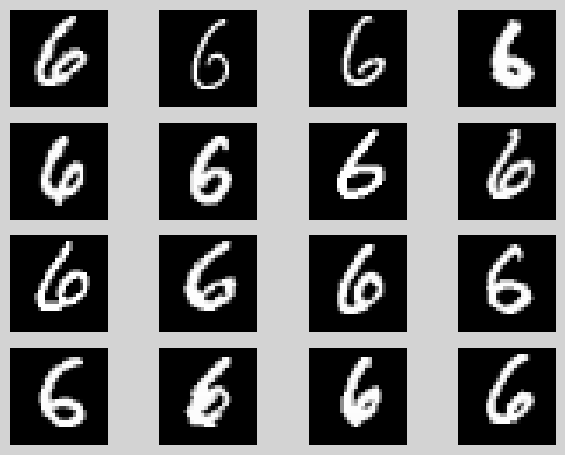

In [16]:
# Plot first 16 images of the zero integer
plotimgs(train[:,6,:], nplot = 4)

**(b)** I denne oppgaven skal vil regne ut SVD-faktoriseringa og se hvordan de første basisvektorene ser ut. I filene er hvert bilde kun en vektor som er 784 lang, mens her gjør vi om vektorene til $28*28$ grid igjen.

In [17]:
n = 1000 # Number of datapoints
c = 6 # Class

A = train[:,c,:n]

print(A.shape) # Expect (784,n)

(784, 1000)


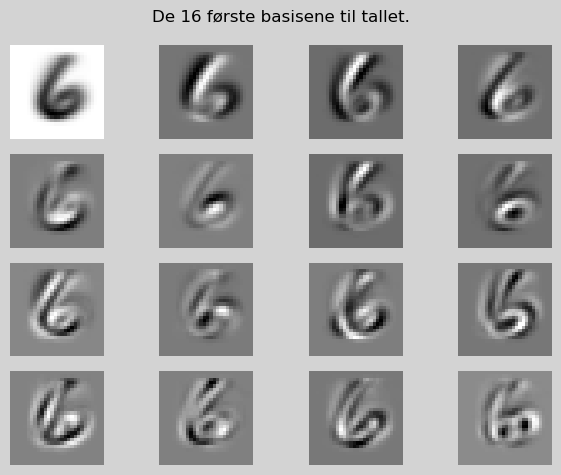

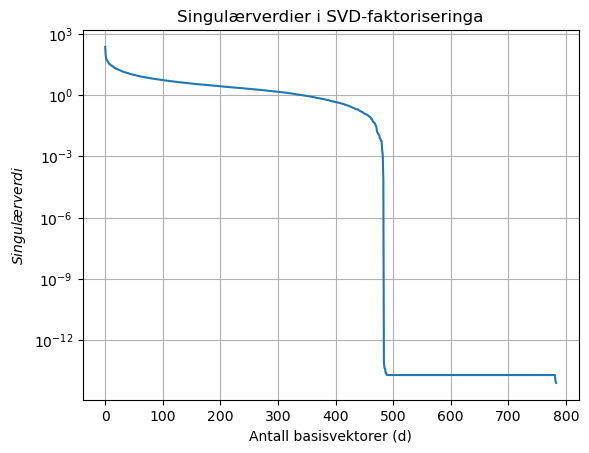

In [18]:
U, S, V = SVD(A)                                       # SVD faktorisering av valgt tall
d = 16                                                 # Antall basisvektorer.
n_singVals = len(S)                                    # Antall singulærverdier.
x_values = np.linspace(0, n_singVals - 1, n_singVals)  # Verdier for å kunne plotte singulærverdier.

plotimgs(U[:,:d], nplot = 4, title="De 16 første basisene til tallet.")  # Plotter de første 16 vektorene i U

plt.figure(2)
plt.title("Singulærverdier i SVD-faktoriseringa")      # Plotter singulærverdiene i minkende rekkefølge logaritmisk
plt.semilogy(x_values, S)
plt.xlabel("Antall basisvektorer (d)")
plt.ylabel("$Singulærverdi$")
plt.grid()
plt.show()

Fra det første plottet ser man at basisen har fått med seg noen trekk fra det håndskrevne tallet 6. Det første bilde viser den viktigste basisvektoren for tallet 6. Dette er et slags gjennomsnitt og den ser nokså lik ut som det man lærte i førsteklasse på barneskolen at et 6-tall skulle se ut som. De andre bildene viser de neste basisvektorene og man ser at man får med flere og flere detaljer og variasjoner, men selv på det siste bilde er det tydelig å se at det er snakk om et 6-tall.

Fra plottet av singulærverdiene med logaritmisk y-akse ser man at størrelsen på singulærverdiene avtar kraftig rundt nummer 500. Disse er praktisk talt 0 i verdi og tilfører ikke basisen noe veldig interessant om tallet i seg selv, men kun små justeringer som gjør at det er mulig å gjenskape flere tall helt korrekt. Man ønsker seg helst så liten basis som mulig, samtidig som den er bestemt nok til å avgjøre hvilket tall det er snakk om.

**(c)** Nå skal vi prøve å projisere et tall ned på basisen, og se hvordan det utvikler seg med antall basisvektorer. Dette testes både med et tall som tilhører basisen, og et som ikke gjør det.

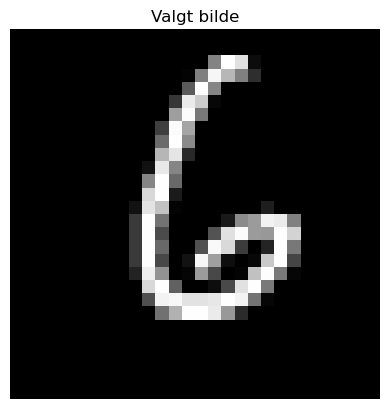

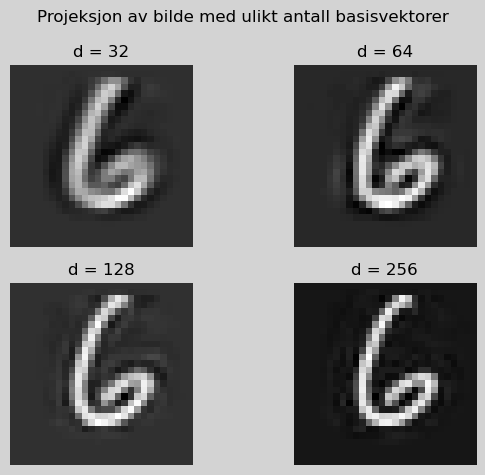

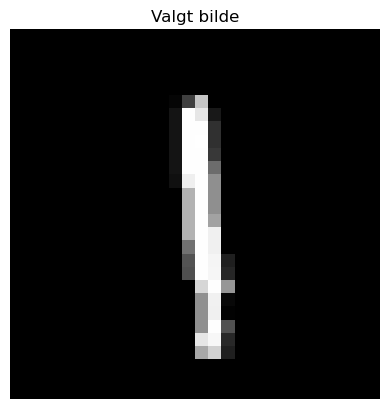

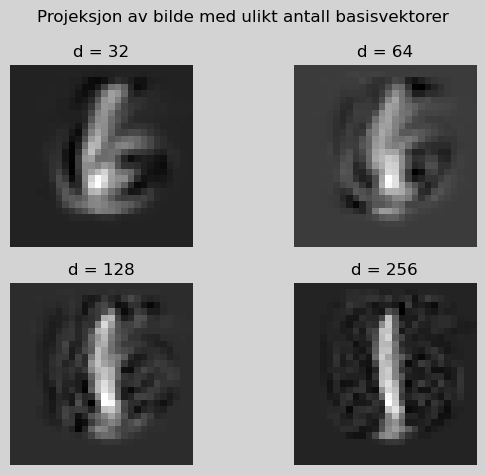

In [19]:
n = 1000 # Number of datapoints
c = 6 # Class

A = train[:,c,:n]
U, S, V = SVD(A)                                       # SVD faktorisering av valgt tall
d = 16        # tar med de øverste linjene for å ha kontroll i notebooken, selv om de ikke er strengt nødvendig

bilde = train[:, c, 2]                                 # Valgt bilde
Annet_bilde = train[:, 1, 2]                           # Valgt bilde som basisen ikke er basert på

def TestPicture(picture, basis):
    """Tar inn et bilde og en basis og plotter
    først det valgte bilde og deretter projeksjonen
    av det samme bilde ned på basisen 4 ganger, med ulikt antall
    basisvektorer."""
    plt.title("Valgt bilde")
    plt.imshow(picture.reshape((28,28)), cmap = 'gray') #Plotter valgt bilde
    plt.axis('off')
    plt.show()

    d = 16
    projeksjoner = np.zeros((784, 4))
    tekst = []
    for i in range(4):
        projeksjoner[:, i] = orthproj(basis[:,:d], picture) # Regner ut projeksjonen av valgt bilde ned på basisen.
        d *= 2
        tekst.append(f"d = {d}")                            # Legger til overskriften til hvert plott i en liste.
    
    overskrift = "Projeksjon av bilde med ulikt antall basisvektorer"
    plotimgs(projeksjoner, nplot = 2, title = overskrift, subtitle = tekst)       # Plotter alle 4 projeksjoner
    
TestPicture(bilde, U)
TestPicture(Annet_bilde, U)

Her ser man at man får en helt grei projeksjon av 6-tallet ned basisen, noe som gir mening siden alle 6-tall har noen likhetstrekk. For økende antall basisvektorer får man med mer og mer særheter og det blir mindre og mindre forskjell fra det faktiske bilde. Men økningen i antallet basisvektorer bidrar ikke til å gi en mye bedre projeksjon enn det første bilde.

Nå man senere prøver å projisere et 1-tall ned på 6-tallet basis ser man nettopp hvorfor man ikke må ha med for mange basisvektorer. For få antall basisvektorer gir en dårlig projeksjon av 1 ned på 6 sin basis. Dette ønsker man ettersom det gjør det mulig å avfeie at 1-tallet er et 6-tall. Med flere basisvektorer blir et nokså greit 1-tall selv om det er projisert ned på 1 sin basis. Det gjør at det er fortere for at algoritmen velger feil tall fordi basisene blir så generelle at man kan gjenskape mange tall med dem. Man ser riktignok at det er en del støy rundt det "fineste" 1-tallet, selv om selve tallet er greit representert.

**(d)** I denne oppgaven skal regnes avstander fra bildene til projeksjonene. Det brukes de samme bildene som i forrige oppgave, så dette kan sammenlignes.

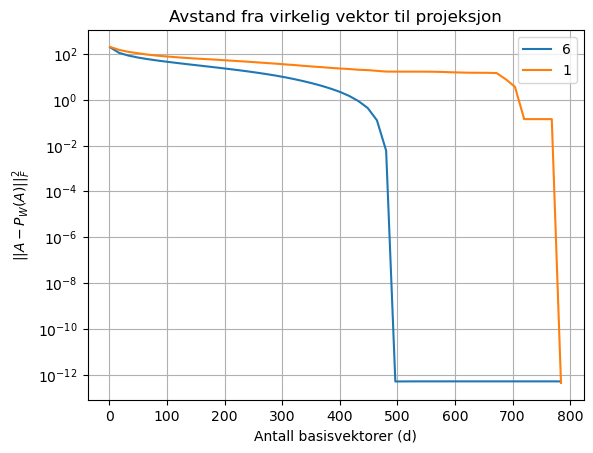

In [20]:
d_values = np.linspace(1, 784, 50)

def avstand(d_values, basis, picture):
    """
    Tar inn liste med d-verdier, hvilken basis som skal brukes og valgt bilde,
    og regner ut avstand fra bilde til projeksjonen og returnerer det i en liste.
    """
    avstander = np.zeros(len(d_values))
    for i in range(len(avstander)):
        avstander[i] = np.linalg.norm(picture - orthproj(basis[:,:int(d_values[i])], picture))
    return avstander


y_values = avstand(d_values, U, train[:,6,:n])            # Regner ut avstand fra virkelig bilde ned på basisen til samme bilde
y_values1 = avstand(d_values, U, train[:,1,:n])           # Regner ut det samme for et bilde som ikke hører til basisen.

plt.figure(4)                                             # Plotter avstanden som funksjon av d med logaritmisk y-akse.
plt.title("Avstand fra virkelig vektor til projeksjon")
plt.semilogy(d_values, y_values, label="6")
plt.semilogy(d_values, y_values1, label="1")
plt.xlabel("Antall basisvektorer (d)")
plt.ylabel("$||A-P_W(A)||_F^2$")
plt.legend()
plt.grid()
plt.show()

Man ser her at 1-tallene har større avstand ned på 6 sin basis enn det 6 har. Det gir mening at 6 tallet er nærmere basisen til 6-tallet enn et 1-tall. Man ser at selv om 1-tallet kunne visuelt representeres godt med 6-tallets basis med nok basisvektorer, så vil fortsatt avstanden være mindre for 6-tallet enn for 1-tallet. Ved siste verdi ser man at 1-tallet kan gjenskapes med 6 sin basis. Det skyldes at U-matrisen består av ortogonale kolonner og når man får en slik matrise med like mange ortogonale basisvektoer som piksler i bilde, vil man med disse vektorene nå hele "bilderommet" uansett konfigurasjon.

Plottet til singulærverdiene og avstanden mellom 6 tallet og basisen er nokså like. Det skyldes at de på mange måter er 2 sider av samme sak. Singulærverdier er viktigheten av hver basisvektor, altså den høyeste singulærverdien har en tilhørende vektor som gjentar seg ofte for 6-tall generelt. Etter hvert kommer de singulærverdiene som ikke tilfører så stort, men som trengs for å kunne gjenskape unike detaljer ved ulike eksempel på 6-tall. På samme måte har man med et fåtall basisvektorer en stor avstand fra virkelig vektor og ned på basisen, mens man etter hvert vil komme til et punkt der man greier å gjenskape detaljer, som fallet i avstand representerer. Så på mange måter er begge plottene en vinkling av hvor detaljrik basisen til et håndskrevet tall er som funksjon av antall basisvektorer.

**(e)** Nå skal samme jobb gjøres med ENMF metoden. Det begynner med å lage dictonarien og sjekke hvordan dette blir for et utvalg av tall.

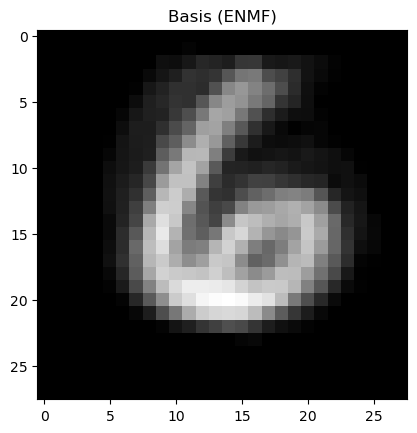

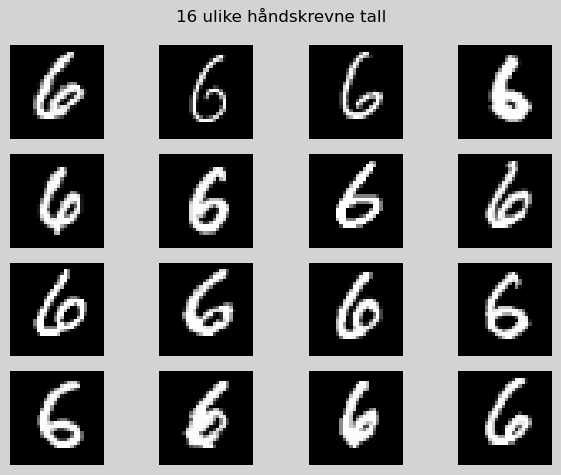

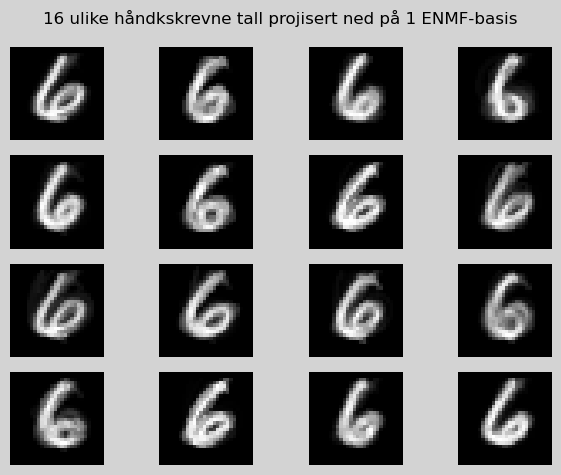

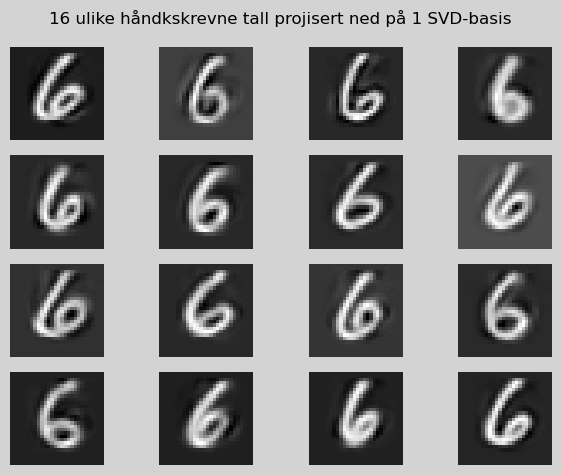

In [21]:
d = 32
n = 1000 # Number of datapoints
c = 6 # Class

def tilfeldigBasis(d, A):
    """
    Tar inn antall basisvektorer d og en treningsmatrise A
    og trekker ut d antall tilfeldige kolonner i A og 
    returnerer en matrise bestående av disse kolonnene
    """
    
    indekser = np.random.choice(A.shape[1], d, replace=False)
    W_nn = np.zeros((784, d))
    
    for i in range(d):
        W_nn[:, i] = A[:, indekser[i]]
    return W_nn


def SVD_projeksjon(d, basis, bilder):
    """
    Tar inn antall basisvektorer d, basisen og bilder
    som skal projiseres, og returnerer projeksjonene i
    en matrise.
    """
    projeksjoner = np.zeros((784, 16))
    for i in range(16):
        projeksjoner[:, i] = orthproj(basis[:,:d], bilder[:, c, i]) # Regner ut projeksjonen av valgt bilde ned på basisen.

    return projeksjoner

W_nn = tilfeldigBasis(d, A)
ENMF_projeksjoner = non_neg_proj(W_nn, train[:, c, :16], 100, 1e-10)
SVD_projeksjoner = SVD_projeksjon(32, U, train)

# Plotter basisen som summen av kolonnene
summen = np.zeros(784)

for i in range(d):
    et_bilde = W_nn[:, i]
    summen += et_bilde

plt.imshow(summen.reshape(28, 28), cmap="gray")
plt.title("Basis (ENMF)")
plt.show()

plotimgs(train[:, c, :16], nplot=4, title="16 ulike håndskrevne tall")
plotimgs(ENMF_projeksjoner, nplot=4, title="16 ulike håndkskrevne tall projisert ned på 1 ENMF-basis")
plotimgs(SVD_projeksjoner, nplot=4, title="16 ulike håndkskrevne tall projisert ned på 1 SVD-basis")

Her har man fin mulighet til å se hvordan projeksjoner av tall ned på basiser fungerer. Det ser ut til at SVD har lettere for å få med seg særpreg, mens detaljene fort blir til mye støy på ENMF-basisen. Det forekommer også tilfeller der en av basisvektorene i ENMF er en av de 16 tallene som er plottet først. Da vil denne kunne gjenskapes $100\%$ fordi den vektoren finnes i basisen. Man ser også at det for ENMF er visuelt lettere bilder å se på, fordi de har sterk kontrast og alltid svart bakgrunn. Det er fordi den er nettopp ikke-negativ altså alle verdiene er positive, i motsetning til SVD. Uansett ser det ut til at alle tallene får en nokså grei projeksjon visuelt i hvert fall. 

**(f)** I denne oppgaven skal hvor god projeksjonen er bestemmes litt mer matematisk. Dette ses i sammenheng med antall basisvektorer.

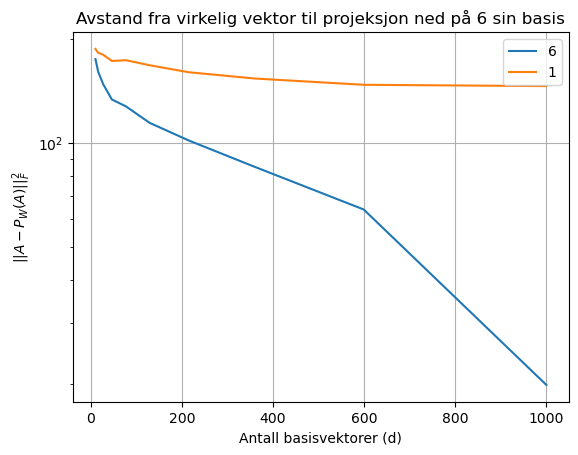

In [22]:
def nn_avstand(d_values, picture, sett):
    """
    Tar inn et array med d verdier, bilde som skal projiseres og
    settet som basisen skal baseres på. Returnerer avstand fra bilde
    til basisen i et array.
    """
    avstander = np.zeros(len(d_values))
    for i in range(len(avstander)):
        avstander[i] = np.linalg.norm(picture - non_neg_proj(tilfeldigBasis(int(d_values[i]), sett), picture, 100, 1e-10))
    return avstander

A = train[:,6,:n]
B = train[:,1,:n]

d_values = np.logspace(1, 3, 10, dtype=np.int64)        # Lager et array med d-verdier
y_values = nn_avstand(d_values, A, A)
y_values1 = nn_avstand(d_values, B, A)

plt.figure(4)
plt.title("Avstand fra virkelig vektor til projeksjon ned på 6 sin basis")
plt.semilogy(d_values, y_values, label="6")
plt.semilogy(d_values, y_values1, label="1")
plt.xlabel("Antall basisvektorer (d)")
plt.ylabel("$||A-P_W(A)||_F^2$")
plt.legend()
plt.grid()
plt.show()

Her ser man at avstanden fra virkelig vektor og basisen er mye større enn SVD i tallverdi. Dette skyldes at SVD har nøye utvalgte basisvektorer, mens SVD har tilfeldige. Likevel får man ønsket effekt med at 1-tallet har mye større avstand enn 6-tallet ned på 6-tallets basis. Jo større denne avstanden er, altså mellom grafene, jo bedre er det, fordi de gir større sikkerhet for hvilken verdi som er riktig når man gjør denne øvelsen baklengs, som er målet til slutt. Man ser også at man ikke får det veldige fallet som SVD, som igjen skyldes at ENMF er tilfeldig valgt, så hver vektorer som legges til ikke er i prioritert rekkefølge.

### Oppgave 3

Til nå har vi anvendt teorien for å lage et grunnlag for programmet slik at det kunne bygge ulike "dictionaries" ved hjelp av forskjellige metoder. Vi har sett på både den ikke-negative matrise dekomponeringen (ENMF) og den vanlige SVD-metoden.
Videre har vi introdusert i programmet vårt ulike bildeanalysemetoder. 
 
I denne oppgaven ser vi på klassifiseringen av forskjellige tall fra et ukjent sett med tall. For å kunne klassifisere de ulike bildene er vi først nødt til å lage dictionaries for de ulike metodene. Disse kommer til å brukes gjennom store deler av oppgaven. Metoden vi klassifiserer tallene på er som beskrevet i teoridelen av prosjektet. Kort sagt projiserer vi dataen til et bestemt tall over en passende 'dictionary' og sjekker avstanden.

**(a)** Vi implementerer i denne deloppgaven funksjonen `classification` som tar inn et sett med data, *dictionaries* som ble enten lagd ved hjelp av den ikke-negative projeksjonen (ENMF) eller ved hjelp av SVD, og som sist `dicts_mode`. Grunnen for at vi tar inn det siste elementet, er at de ENMF- og SVD-metodene fungerer på forskjellige måter (for eks. må ENMF ta inn en `maxiter`). I tillegg til det lager vi to funksjoner i senere deler av oppgaven. Funksjonen `accuracy` beregner nøyaktigheten til funksjonen `classification`, mens funksjonen `class_accuracy` beregner hvor nøyaktig `classification` klassifiserer de forskjellige tallene. 

Vi begynner oppgaven med å lage en funksjon som lager *dictionaries*.

In [23]:
'''''
Oppgave 3a)

Funksjonene 'SVD_dictionaries' og 'ENMF_dictionaries' tar inn "trening", som er et set med tall  slik at programmet vårt får trent opp, 
og et tall "d", som trunkerer "dictionaries". Til slutt ender vi med en 3D-matrise, en såkalt tensor, som inneholder 
basis vektorer for hver "digit", altså for hvert tall (0,1,...,9).

'''''

def SVD_dictionaries(trening,d):
    k = trening.shape[0] #k = 784
    W_list = np.zeros((10,k, d)) #første element: tall, 2.element: piksler, 3.element: basis vektorer --> får tensor

    for i in range(10):
        U,S,V = SVD(trening[:,i,:]) #SVD
        W_list[i] = truncSVD2(U,S,V,d)[0] #lager basis vektorer for hvert tall
        
    return W_list #hvert tall (0,1,...,9) har en egen matrise som inneholder basis vektorer.

In [24]:
#her bruker vi den ikke-negative metoden (ENMF) --> betraktelig fortere, så den tåler høye 'd'

def ENMF_dictionaries(trening,d): 
    k = trening.shape[0] #784
    W_list = np.zeros((10, k, d))#første element: tall, 2.element: piksler, 3.element: basis vektorer --> får tensor
    
    for i in range(10):
        W_list[i] = tilfeldigBasis(d,trening[:,i,:]) #lager basis vektorer for hvert tall. Bruker funksjon fra 2e)
        
    return W_list #hvert tall (0,1,...,9) har en egen matrise som inneholder basis vektorer.

Nå at vi har lagd de "dictionaries" som vi trenger for oppgaven, kan vi implementere funksjonen `classsification`. Funksjonen følger med metoden presentert i seksjon `6.2`.

In [25]:
'''''
Funksjonen 'classification' tar inn et set med data som skal testes, og "dictionaries" for både ENMF og SVD. I tillegg
til det tar funksjonen også et "mode" som bestemmer om vi skal bruke ENMF- eller SVD-metoden. Dette kan spare oss tid 
dersom vi bare trenger å teste én beregningsmetode. 

Funksjonen returnerer til slutt en array med tall som datamaskinen har "gjettet" og avstanden mellom projeksjonen
av tallene over basisvektorene og selve basisvektorene.

'''''

def classification(B, dicts_ENMF, dicts_SVD, dicts_mode): #mode = 'ENMF' eller 'SVD'
    maxiter = 50
    delta = 10**(-10)
    data_type = int(B.ndim) #sjekker om vector eller matrise
    
    if dicts_mode == 'ENMF' and data_type == 1: #dersom ENMF og data er en vector
        avstander = np.zeros(10) 
        
        for i in range(10): #vi har ti tall (0 til 9)
            Be = np.transpose(np.matrix(B)) #gjør om vectoren til en matrise og transponerer den 
            avstander[i] = np.linalg.norm(Be - non_neg_proj(dicts_ENMF[i], Be, maxiter, delta)) #tar Frobenius-normen
            
        return np.argmin(avstander), avstander #returnerer både tallet som ble predikert (vha. argmin) og avstandene
    
    
    
    elif dicts_mode == 'ENMF' and data_type == 2: #dersom ENMF og data er en matrise
        antall_tall = B.shape[1] #hvor mange tall vi skal se på
        avstander_2d = np.zeros((antall_tall,10)) #matrise med 10 kolonner
        guess = np.zeros(antall_tall)

        for i in range(10):
            for j in range(antall_tall):
                Be = np.transpose(np.matrix(B[:,j])) #fjerne np.transpose dersom det oppstår problemer
                #Be = Be.T
                avstander_2d[j][i] = np.linalg.norm(Be - non_neg_proj(dicts_ENMF[i], Be, maxiter, delta))
                guess[j] = np.argmin(avstander_2d[j]) #finner den minste avstanden i hver liste med avstander
                
        return guess, avstander_2d #returner flere predikerte tall og avstandene
    
    
    
    elif dicts_mode == 'SVD' and data_type == 1: #dersom SVD og vektor
        avstander = np.zeros(10)

        for i in range(10): #vi har ti tall (0 til 9)
            avstander[i] = np.linalg.norm(B - orthproj(dicts_SVD[i],B)) #bruker funksjonen orthproj fra oppgave 1)
            
        return np.argmin(avstander), avstander #returnerer både tallet som ble predikert (vha. argmin) og avstandene
    
    
    
    elif dicts_mode == 'SVD' and data_type == 2: #dersom SVD og vektor
        antall_tall = B.shape[1]
        avstander_2d = np.zeros((antall_tall,10)) #lager en tom matrise
        guess = np.zeros(antall_tall)

        for i in range(10):
            for j in range(antall_tall):
                avstander_2d[j][i] = np.linalg.norm(B[:,j] - orthproj(dicts_SVD[i],B[:,j])) #bruker funksjonen orthproj fra oppgave 1)
                guess[j] = np.argmin(avstander_2d[j]) #finner den minste avstanden i hver liste med avstander
                
        return guess, avstander_2d #returner flere predikerte tall og avstandene

    
    #bare i tilfelle funksjonen får feil input
    else:
        feilmelding = "Wrong input"
        return feilmelding

Vi har lagd en funksjon som kan klassifisere tall. Vi kan dermed sjekke nøyaktig hvor den er plassert. 

In [26]:
'''''

Funksjonen 'accuracy' tar inn en array med fasit (riktige_tall), det vil si de riktige tallene, og en array med tall
som har blitt gjettet av datamaskinen (tall_AI). Merk at lengden på 'riktige_tall' og 'tall_AI' må være like. Til 
slutt får vi returnert et tall som forteller om hvor presis datamaskinen er. 

Funksjonen 'class_accuracy' tar inn en array med fasit (riktige_tall), en array med tall som har blitt gjettet av 
datamaskinen (tall_AI) og 'digits', en array med de forskjellige tallene som har blitt brukt for å generere et 
test-set.

'''''

def accuracy(riktige_tall, tall_AI):

    accuracy_preds = np.zeros(len(riktige_tall))
    
    #sjekker om de gjettede tallene stemmer overens med fasiten, og gir ett poeng dersom det er sant:
    accuracy_preds[tall_AI == riktige_tall] = 1 
    
    return np.sum(accuracy_preds)/len(riktige_tall) #returnerer et score


def class_accuracy(riktige_tall, tall_AI, digits):
    n = len(digits)
    
    accuracy_per_class = np.zeros(n)
    number_of_class = np.zeros(n)
    
    #finner indeksene til plassene der de gjettede tallene stemmer overens med fasiten
    indexes = np.where(riktige_tall == tall_AI)[0] 

    for i in range(n):
        #lager en liste som inneholder info om hvor mange ganger et tall i 'digits' dukker opp
        number_of_class[i] = len(np.where(riktige_tall == digits[i])[0]) 

        for j in indexes:
            #deler ut poeng på plassen til gjeldende 'class'
            if riktige_tall[int(j)] == digits[i]: 
                accuracy_per_class[i] +=1
                
    result = accuracy_per_class/number_of_class #score per class
    
    #det kan hende at man får feilmelding grunnet deling på null, men jo større data set, desto mindre sannsynligheten
    np.seterr(invalid='ignore')  #slipper feilmelding 
    
    return result #returnerer en array med score per class

**(b)** Nå at vi har lagd funksjoner som kan klassifisere tall, og analysere nøyaktigheten til klassifiseringen, kan vi teste de og sjekke hvor presis funksjonen `classification` er. Vi velger i utgangspunktet $d=32$ for å spare på kjøretid. 

In [27]:
"Oppgave 3b)"
#starter med å lage en dictionary for både SVD og ENMF

d = 32 #vi velger d=32 for både ENMF og SVD.
dictionaries_SVD = SVD_dictionaries(train,d)
dictionaries_ENMF = ENMF_dictionaries(train,d)

In [28]:
'''''   

For at vi kan teste koden vår, må vi generere et sett med tilfeldig data. Vi bruker funksjonen 'generate_test'
som har blitt delt ut. 

'''''

def generate_test(test, digits, N=800):
    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

In [29]:
from tabulate import tabulate #for å lage pene tabeller

#bruker test data:
digits = [2,3,8] #vi skal teste tallene 2,3 og 8. Dette er tall som vi synes kan ligne på hverandre
A_test, A_labels = generate_test(test, digits, N = 800)

#test data
k = 100 #hvor mange tall som vi skal ha for å teste 
test_data = A_test[:,:k]

#prediksjoner til datamaskinen ved forskjellige ordbok
predictions_ENMF, avstander_ENMF = classification(test_data, dictionaries_ENMF, dictionaries_SVD, 'ENMF') 
predictions_SVD, avstander_SVD = classification(test_data, dictionaries_ENMF, dictionaries_SVD, 'SVD')

#accuracy
accuracy_ENMF_b = accuracy(A_labels[:k],predictions_ENMF)
accuracy_SVD_b = accuracy(A_labels[:k],predictions_SVD)

#class accuracy
class_accuracy_ENMF_b = class_accuracy(A_labels[:k], predictions_ENMF, digits = [2,3,8])
class_accuracy_SVD_b = class_accuracy(A_labels[:k], predictions_SVD, digits = [2,3,8])

#lager tabell
data_ENMF = [["Recall", f' {class_accuracy_ENMF_b[0]}', f' {class_accuracy_ENMF_b[1]}', f' {class_accuracy_ENMF_b[2]}'],
["Accuracy for all digits", accuracy_ENMF_b]]
print(tabulate(data_ENMF, headers=[f'ENMF, d = {d}', f'digit: {digits[0]}', f'digit: {digits[1]}', f'digit: {digits[2]}']))
print()
print()

data_SVD = [["Recall", f' {class_accuracy_SVD_b[0]}', f' {class_accuracy_SVD_b[1]}', f' {class_accuracy_SVD_b[2]}'],
["Accuracy for all digits", accuracy_SVD_b]]
        
print(tabulate(data_SVD, headers=[f'SVD, d = {d}', f'digit: {digits[0]}', f'digit: {digits[1]}', f'digit: {digits[2]}']))

ENMF, d = 32               digit: 2    digit: 3    digit: 8
-----------------------  ----------  ----------  ----------
Recall                     0.969697     0.69697    0.647059
Accuracy for all digits    0.77


SVD, d = 32                digit: 2    digit: 3    digit: 8
-----------------------  ----------  ----------  ----------
Recall                     0.969697    0.787879    0.970588
Accuracy for all digits    0.91


Tabellen over inneholder treffsikkerheten for hver metode og for hvert tall (recall), samt den gjennomsnittlige presisjonen. Vi ser at ENMF-metoden har en tydelig lavere score enn SVD-metoden med 32 basisvektorer. Ut ifra tallene som vi har valgt, virker det som om ENMF-metoden sliter med å gjenkjenne tallet $8$, og det hender at treffiskkerheten for samme tallet havner under $80\%$. "Recallen" til de andre to tallene ligger på omtrent $90\%$.


SVD-metoden ser ut til å virke noe bedre og kommer ofte over $90\%$. I tillegg til det er "recallen" til SVD jevnere enn den til ENMF. Grunnen til at SVD-metoden funker bedre enn ENMF-metoden i det tilfellet kan skyldes på at vi har for lite antall basisvektorer. Det vil si at ENMF-metoden er mindre treffsikker enn SVD-metoden ved lave $d$. Dette er fordi ENMF velger basisvektorer tilfeldig, mens SVD velger de viktigste basisvektorene. 


Likevel er det noen unntak også for treffsikkerheten til SVD-metoden. I senere deler av oppgaven skal vi plotte de tallene som ble misklassifisert, og vi kommer til å se at i noen av tilfellene metodene tar feil, hadde et menneske en stor sannsynlighet til å ta feil. Men det er jo nettopp meningen med dette datasettet, at noen av tallene er såpass vanskelige å gjenkjenne at det gir en god indikasjon på om metodene fungerer eller ikke.


PS.: Vi så presiseringen om at man ikke skulle teste for alle tall mellom $0$ og $9$ såpass sent, at vi ikke rakk å rette det opp. Det ville sannsynligvis gitt en treffsikkerhet over $90\%$

**(c)** I denne deloppgaven skal vi se på bildet av et tall som er nærmest projeksjonen til en *dictionary* av valg. Vi bestemmer oss for SVD-ordboka. Grunnen til det er at den er mer presis for lave verdier for $d$.

Tallet som hadde lavest avstand til basisvektorene: 2
SVD sier: 2


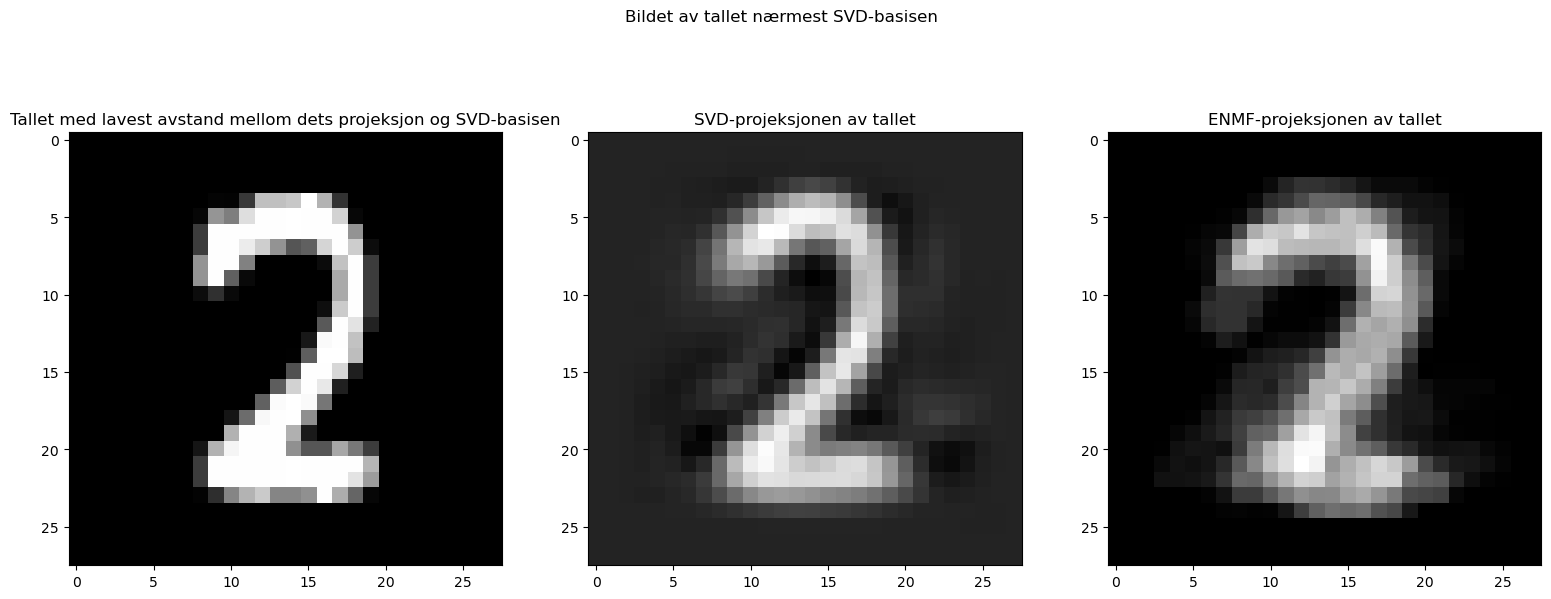

In [30]:
'''''
Oppgave 3c)

Finer tallet som hadde lavest avstand til basisvektorene. Siden vi bruker 'np.where' fårr vi returnert to tall. 
'lowest_list_SVD' er indeksen til listen hvor den laveste verdien er. 'lowest_place_SVD' er posisjonen til den laveste
verdien inn i selve listen, det vil si selve tallet.

'''''
#finner indeksen til den laveste verdien i 2D-arrayen 'avstander_SVD':
lowest_list_SVD, lowest_place_SVD = np.where(avstander_SVD == np.min(avstander_SVD)) 

#finner pikslene til det aktuelle tallet 
data_plot_SVD = test_data[:, lowest_list_SVD]

#projeserer for både ENMF og SVD. Det er ikke nødvendig med ENMF
projeksjon_ENMF1 = non_neg_proj(dictionaries_ENMF[lowest_place_SVD][0],(np.matrix(data_plot_SVD[:,0])).T, 50, 10**-10)
projeksjon_SVD1 = orthproj(dictionaries_SVD[lowest_place_SVD][0],data_plot_SVD[:,0])


print(f'Tallet som hadde lavest avstand til basisvektorene: {lowest_place_SVD[0]}')
print(f'SVD sier: {lowest_place_SVD[0]}')


#plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19,7)) #plot med 3 kolonner

im = ax[0].imshow(data_plot_SVD.reshape((28,28)), cmap = 'gray')
ax[0].set_title(r'Tallet med lavest avstand mellom dets projeksjon og SVD-basisen')

im = ax[1].imshow(projeksjon_SVD1.reshape((28,28)), cmap = 'gray')
ax[1].set_title(r'SVD-projeksjonen av tallet')

im = ax[2].imshow(projeksjon_ENMF1.reshape((28,28)), cmap = 'gray')
ax[2].set_title(r'ENMF-projeksjonen av tallet')

fig.suptitle("Bildet av tallet nærmest SVD-basisen")
plt.show() 

Figuren over viser tallet i test-databasen som var nærmest basisen som vi fant med SVD-metoden, SVD-projeksjonen av selve tallet, og ENMF-projeksjonen av det tallet. Man ser at selv om tallet er veldig nærme en basis trenger det ikke nødvendigvis å være veldig nærme den andre basisen.

**(d)** Nå at vi har funnet det tallet som var nærmest basisvektorene til SVD, virker det naturlig at vi også finner tallet som hadde størst avstand til basisvektorene. For å finne tallet som hadde det største avviket har vi lagd funksjonen `outlier`. 

In [31]:
'''''
Oppgave 3d)

Funksjonen 'outlier' tar inn en array med tall som har blitt gjettet av datamaskinen (predictions), en array med fasit
(correct_numbers), selve tallet som vi har plottet i deloppgave c), og en array med avstander mellom projeksjonene
og basisvektorene. Til slutt returnerer vi en array med de minste avstandene for hvert analysert tall. 

'''''

def outlier(predictions, correct_numbers, number, distances):

    #finner indeksene til stedene der datamaskinen viker av fra fasiten
    index_avvik = np.where(predictions != correct_numbers)[0] 
    avstander = [] 
        
    for index in index_avvik:
        if correct_numbers[int(index)] == number: #sjekker for hvert tall i fasiten om den er lik tallet vi fant i c)
            
            #tar minste avstanden til hver liste i 'distances' som burde inneholdt det ene tallet vi fant i c):
            minimum = np.min(distances[[int(index)]]) 
            avstander.append(minimum)
        
    return avstander #liste med feil klassifisert data

Riktig tall: 2
SVD sier: 8
ENMF sier: 2


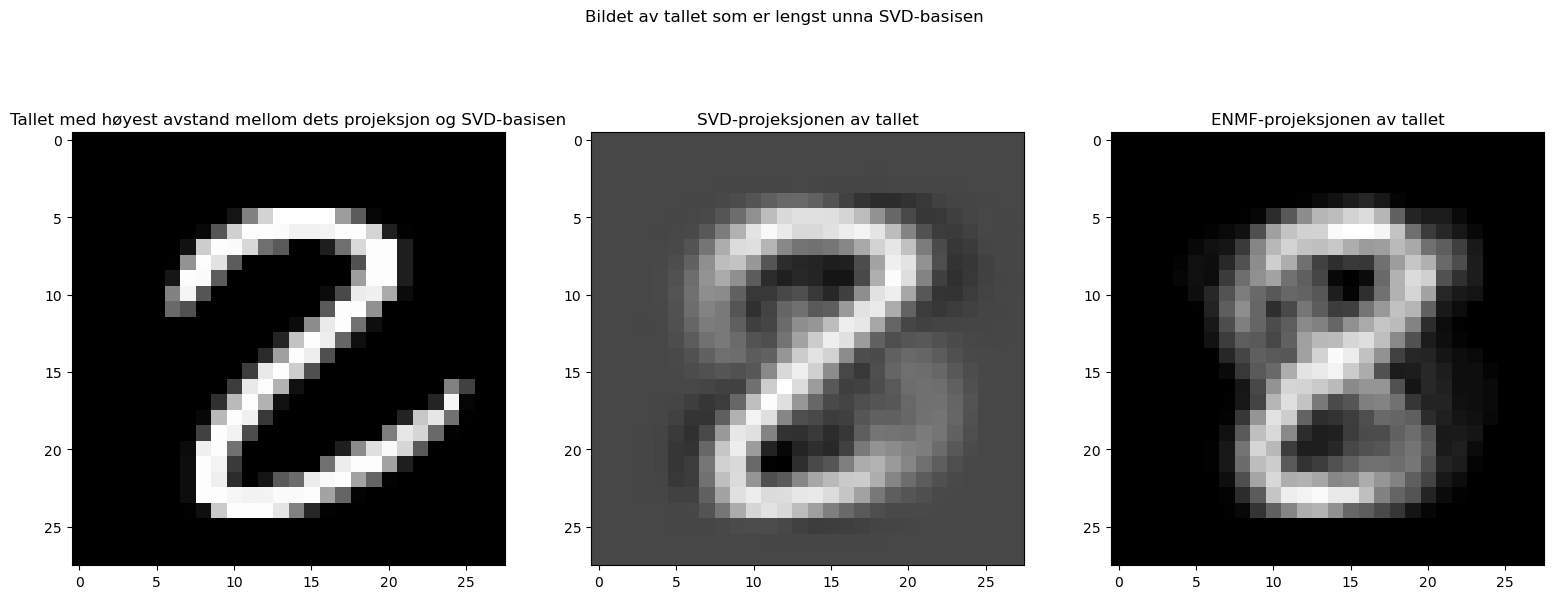

In [32]:
#d)
#for SVD

'''''

Her følger vi med den prosedyren som i forrige deloppgaven, unntatt at vi leter etter det største tallet. 

'''''

k = 100 #gjennomfører analysen for 100 tall  --> kan økes dersom man ønsker det
dummy_SVD = outlier(predictions_SVD, A_labels[:k], lowest_place_SVD[0], avstander_SVD)

#finner indeksen til tallet som har blitt feilklassifisert og som har høyest avstand
highest_list_SVD, highest_place_SVD = np.where(avstander_SVD == [np.max(dummy_SVD)])
data_plot_SVD = test_data[:,highest_list_SVD] #finner gjeldende pikslene

projeksjon_ENMF_d2 = non_neg_proj(dictionaries_ENMF[highest_place_SVD][0],(np.matrix(data_plot_SVD[:,0])).T, 50, 10**-10)
projeksjon_SVD_d2 = orthproj(dictionaries_SVD[highest_place_SVD][0],data_plot_SVD[:,0])


print(f'Riktig tall: {int(lowest_place_SVD[0])}')
print(f'SVD sier: {highest_place_SVD[0]}')
print(f'ENMF sier: {int(predictions_ENMF[highest_list_SVD][0])}')

#plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19,7))

im = ax[0].imshow(data_plot_SVD.reshape((28,28)), cmap = 'gray')
ax[0].set_title(r'Tallet med høyest avstand mellom dets projeksjon og SVD-basisen')

im = ax[1].imshow(projeksjon_SVD_d2.reshape((28,28)), cmap = 'gray')
ax[1].set_title(r'SVD-projeksjonen av tallet')

im = ax[2].imshow(projeksjon_ENMF_d2.reshape((28,28)), cmap = 'gray')
ax[2].set_title(r'ENMF-projeksjonen av tallet')

fig.suptitle("Bildet av tallet som er lengst unna SVD-basisen")
plt.show()

Dette er de tallene som de to metodene er mest usikre på, eller der gjettet tall har lengst avstand mellom virkelig vektor og projeksjon. Her ser man tydelig forskjeller mellom tallet som har blitt funnet i denne deloppgaven og det som har blitt funnet i den forrige deloppgaven. Den største forskjellen er at de håndskrevne tallene er veldig spesielle slik at det i noen tilfeller også kan være vanskelig for mennesker å avgjøre hvilket tall det er snakk om. 

I tillegg til det ser man at projeksjonen til tallet ikke gir mye mening, noe som er en god ting. Fordi når man har avstanden som en størrelse, kan man sammenligne den med hva avstanden typisk er når gjettet er riktig. På den måten har man en indikator på hvor stor sannsynligheten er for at gjettet er riktig. Denne fremgangsmåten er bedre enn en metode som er noenlunde treffsikker, og som ikke kan si noe om dens treffsikkerhet.

**(e)** I denne deloppgaven legger vi til et nytt tall i testen vår. Vi valgte tallet `9` fordi den kan ligne på tallet `8` hvis skriften er varierende.  

In [33]:
#e)
digits = [2,3,8,9] #vi legger til 9 inn i listen vår med digits
E_test, E_labels = generate_test(test, digits, N = 800) #genererer et nytt set med data slik at tallet 9 er inkludert

#klassifiserer data --> vi trenger ikke å trene datamaskinen siden den allerede er trent for alle tall fra 0 til 9.
predictions_ENMF = classification(E_test, dictionaries_ENMF, dictionaries_SVD, 'ENMF')[0] #ENMF
predictions_SVD = classification(E_test, dictionaries_ENMF, dictionaries_SVD, 'SVD')[0] #SVD

#accuracy
ENMF_accuracy = accuracy(E_labels, predictions_ENMF)
SVD_accuracy = accuracy(E_labels, predictions_SVD)

#recall
ENMF_recall = class_accuracy(E_labels, predictions_ENMF, digits)
SVD_recall = class_accuracy(E_labels, predictions_SVD, digits)

#lager tabell
data_ENMF = [["Recall", ENMF_recall[0], ENMF_recall[1], ENMF_recall[2], ENMF_recall[3]],
["Accuracy for all digits", ENMF_accuracy]]
print(tabulate(data_ENMF, headers=[f'ENMF, d = {d}', f'digit: {digits[0]}', f'digit: {digits[1]}', f'digit: {digits[2]}', f'digit: {digits[3]}']))
print()
print()

data_SVD = [["Recall", SVD_recall[0], SVD_recall[1], SVD_recall[2], SVD_recall[3]],
["Accuracy for all digits", SVD_accuracy]]
        
print(tabulate(data_SVD, headers=[f'SVD, d = {d}', f'digit: {digits[0]}', f'digit: {digits[1]}', f'digit: {digits[2]}', f'digit: {digits[3]}']))

ENMF, d = 32               digit: 2    digit: 3    digit: 8    digit: 9
-----------------------  ----------  ----------  ----------  ----------
Recall                     0.92625        0.865     0.73875     0.84625
Accuracy for all digits    0.844063


SVD, d = 32                digit: 2    digit: 3    digit: 8    digit: 9
-----------------------  ----------  ----------  ----------  ----------
Recall                       0.94       0.92875     0.93125        0.93
Accuracy for all digits      0.9325


Tabellen over inneholder treffsikkerheten for hver metode og for hvert tall (recall), samt den gjennomsnittlige presisjonen. I motsetning til deloppgave b har vi i denne deloppgaven lagd til et tall til. Vi velger tallet 9 som det fjerde tallet. 


Som i oppgave b valgte vi å ha 32 basisvektorer for begge metodene. Med et tall i tillegg til de andre 3 tallene som vi brukte i forrige deloppgaver, får vi et større grunnlag for sammenligning. Dersom vi sammeligner om det er noen tall som har en tydelig tendens til å bli oftere mistolket enn andre, ser det ut i dette tilfellet som ENMF-metoden har problemer med å gjenkjenne 8-tallet. Dette kan imidlertid endre seg dersom vi lager basisene på nytt. 

Uansett virker det som om SVD-metoden med 32 basisvektorer er mer presis og har en mer jevn treffsikkerhet enn ENMF-metoden med like mange basisvektorer. 

Det virker imidlertid som om resultatene fra denne deloppgaven ikke varierer mye med de fra deloppgave b. Dette kan skyldes på metoden som vi bruker for å sjekke avstandene til de forskjellige basisene. Siden vi sjekker avstandene mellom projeksjonene og basisvektorene til **alle tall** fra 0 til 9, vet datamaskinen vår om eksistensen til det nye tallet (9) som vi har lagt til. Det vil altså si at vår "dictionary" bare tar avstanden til tallet 9 i tillegg, og vi ender ikke opp med en forbedret "recall". Vi får imidlertid en høyere treffsikkerhet enn i deloppgave b.

**(f)** I alle forrige deloppgavene har vi eksperimentert med funksjonen `classification` med varierte innstillinger, men aldri med antallet $d$ av basisvektorer i *dictionaries*-ene våre. Den var alltid satt på $d=32$. I denne deloppgaven skal vi eksperimentere med forskjellig antall basisvektorer og plotte nøyaktigheten til klassifiseringen med varierende antall basisvektorer. 

In [34]:
"Oppgave 3f)"

'''''

Funksjonene under, 'experiment_ENMF' og 'experiment_SVD', fungerer på samme måte og tar inn et sett med treningsdata 
(trening), data som skal testes (test_data), en fasit med forskjellige classes (labels) og en liste med classes 
(digits). Begge funksjonene returnerer en array med presisjoner for ulike trunkeringstall 'd' og en annen array med 
de ulike trunkeringstallene 'd' som ble brukt i løpet av eksperimentet. 

'''''


def experiment_ENMF(trening, test_data, labels, digits): #test data og labels fra oppgave 3e) gjenbrukes
    Max = 15
    
    accuracy_array_ENMF = np.zeros(Max)
    
    d = np.array([i*50 for i in range(Max)]) #array med d = i*50. NB: ENMF kjører ikke lenge for høye 'd'.
    dictionaries_ENMF = ENMF_dictionaries(trening, d[Max - 1])
    
    for i in range(Max):
        #finner presisjonen ved gitt 'd' --> tar inn labels, klassifisering og ulike dictionnaries
        accuracy_array_ENMF[i] = accuracy(labels, classification(test_data, dictionaries_ENMF[:,:,:d[i]], dictionaries_SVD, 'ENMF')[0])
        
    return accuracy_array_ENMF, d #returnerer d og en array med presisjoner


def experiment_SVD(trening, test_data, labels, digits): #test data og labels fra oppgave 3e) gjenbrukes
    Max = 15
    
    accuracy_array_SVD = np.zeros(Max)
    
    d = np.array([i*50 for i in range(Max)]) # array med d = i*50. NB: SVD kjører lenge for høye 'd'
    
    dictionaries_SVD = SVD_dictionaries(trening, d[Max - 1])
    
    for i in range(Max):
        #finner presisjonen ved gitt 'd' --> tar inn labels, klassifisering og ulike dictionnaries
        accuracy_array_SVD[i] = accuracy(labels, classification(test_data, dictionaries_ENMF, dictionaries_SVD[:,:,:d[i]], 'SVD')[0])
        
    return accuracy_array_SVD, d # returnerer d og en array med presisjoner

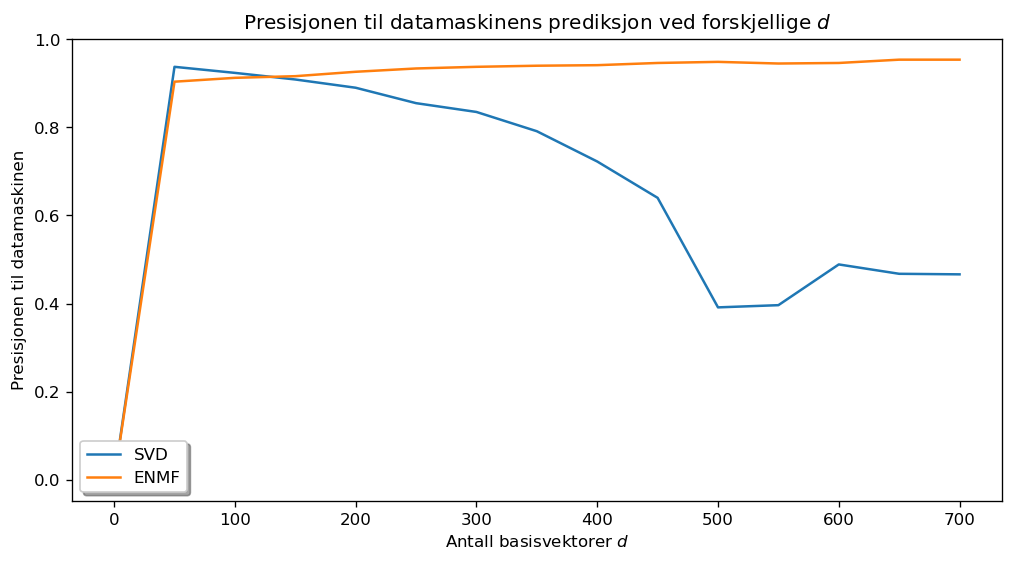

In [35]:
#lager en array for presisjonen for ENMF
accuracy_array_ENMF, d_ENMF = experiment_ENMF(train, E_test[:,:800], E_labels[:800], digits)
#lager en array for presisjonen for SVD
accuracy_array_SVD, d_SVD = experiment_SVD(train, E_test[:,:800], E_labels[:800], digits)


#plotting

plt.figure(figsize=(10, 5), dpi=120) #lager et større bilde enn default

plt.plot(d_SVD, accuracy_array_SVD, label='SVD')
plt.plot(d_ENMF, accuracy_array_ENMF, label='ENMF')

#navn på aksene, tittel, og legend
plt.xlabel(r'Antall basisvektorer $d$')    
plt.ylabel(r'Presisjonen til datamaskinen')    
plt.legend(loc=3, shadow=True)
plt.title(r'Presisjonen til datamaskinens prediksjon ved forskjellige $d$')

plt.show()

Fra figuren over ser man at for de 50 første basisvektorene blir presisjonen til begge metodene stadig bedre. Etter en stund avtar SVD-metoden kraftig, mens treffsikkerheten til ENMF-metoden flater ut. Dette kommer nok at av SVD har de viktigste vektorene først og dermed bidrar mange vektorer bare til å kunne gjenskape feil tall slik vi så i oppgave 2.

Derimot ser vi for ENMF at jo flere basisvektorer, desto større blir avstanden det mellom projeksjonen av det riktige tallet og projeksjonen av feil tall. Det ser vi her som økt treffsikkerhet med høyere antall basisvektorer. Oppsummert er best dersom vi har $d=32$ basisvektorer for SVD-metoden, mens ENMF-metoden er mest treffsikker med over 100 basisvektorer.

## Diskusjon

I første oppgave lagde vi funksjoner som vi senere måtte bruke og testa disse på enkle testproblem. Vi fant ut at både SVD og ENMF ga nokså gode resultater når vi skulle finne proijeksjonen og avstanden fra datapunktet til projeksjonen. For testoppgavene vi gjorde var DVD mest presis. Vi fant også ut at det var mulig å bruke redusert SVD uten å miste informasjon, så lenge man kuttet vekk deler av matrisene som hørte til singulærverdier lik null. Etter det var det forsatt mulig å fjerne større deler av matrisene, men da gikk det tapt informasjon som gikk utover nøyaktigheten i utregningene.

I andre oppgave brukte vi funksjonene fra første oppgave til å lage program som regnet ut basiser til tall ved å ta inn en rekke kjente tall og senere regnet ut projeksjonen av vilkårlige tall ned på projeksjonen og så hvordan de fungerte. Det vi fant ut var med selv lite antall basisvektorer greide man å gjenskape bilder veldig godt. og at man ved mange basisvektor greide å gjenskape de aller fleste tall, noe som ikke er ønskelig. Vi observerte også at det visuelt var mye lettere å se på projeksjoner ned på ENMF-basiser enn SVD-basiser. Det var nok fordi det kun være positive tall i ENMF og det ga tydeligere forskjell enn SVD. Likevel synes SVD til å være en kraftigere metode, som viste seg med at avstand mellom et vilkårlig tall og projeksjonen av dette tallet på sin egen basis konvergerte mye raskere enn ENMF. 

I tredje oppgave systematiserte vi delene fra andre oppgave og prøvde det med mer data. Koden ble her nokså mye tyngre å kjøre fordi den skulle gjennom alle de forholdsvis store operasjonene som var hver for seg tidligere. Vi så på når de to metodene fungerte godt, og når de kom til kort, og vi så at for forholdsvis små $d$ var SVD mye bedre enn ENMF. Senere så vi at SVD avtar etter hvert mens ENMF fortsetter å være nokså presis. Men da måtte vi opp noen 100 basisvektorer, og da kan man lure på hvor mye mer man har spart på å slippe å gjøre SVD-faktoriseringen når man må ha et så stort datasett for å kunne bruke det. For når man har trent dictionarien med SVD-metoden er den tunge jobben gjort, og man kan bruke denne uten så store operasjoner, mens for ENMF går faktoriseringa mye lettere, men det blir mye flere operasjoner når man faktisk skal bruke dictionarien senere.

## Konklusjon

For å konkludere dette prosjektet har vi lært hvordan man kan bruke lineær algebra til å lage et program som gjenkjenner håndskrevne tall. Vi brukte to forskjellige metoder for å bygge forskjellige "dictionaires". Videre analyserte vi fordelene og ulempene med de ulike metodene for Dictionary Learning. Med en gjennomsnittlig treffsikkerhet av $90\%$ er vi fornøyde med resultatene. 

Dictionary Learning er en viktig prosess dersom vi ønsker å skape kunstig intelligens. Denne prosessen hjelper datamaskinen til å hente kunnskap på en trygg måte, og veileder den til å ta stadig mer selvstendige avgjørelser. Videre kan vi tenke oss at en implementasjon av såkalt Machine Learning vil forbedre treffsikkerheten til datamaskinen slik at den til slutt klarer å gjenkjenne de vanskeligste tegningene. 